# Classification

Note this example is taken from Hands-On Machine Learning with Scikit-Learn, Keras & tensorFlow by Aurelien Geron.

https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb



In [ ]:
# sklearn is a library for machine library and we're going to get the iris data
# set from it.

# https://en.wikipedia.org/wiki/Iris_flower_data_set

# We will also load the matplotlib and numpt libraries.

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# let's load the dataset we are going to use

iris = load_iris(as_frame=True)

# then we can look at the 'things' that are associated with the data set

list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
# use iris? to get the help page
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# the object returned also has a nice DESCR function which tells us all about the data set.
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# look at each key in turn to see what it looks like
# e.g. iris.data


In [ ]:
iris.data.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
# Now we are going to get a set of labels for the data.
# We want these lavels to be 1 whwn the flower is of a particular type and zero otherwise
# we can get the target names using iris.target_names

# What does this function do?


y = (iris["target"] == 2).astype(int)


In [ ]:
# We can also use the target names directly but it's a bit more complex
y = iris.target_names[iris.target] == 'virginica'


In [ ]:
# We are going to be doing what is known as logistic regression. i.e. binary 0/1 or true false.
# so let's load that library

from sklearn.linear_model import LogisticRegression

# We will also be be splitting our data into training and test data.
# luckily there is a function for that.
from sklearn.model_selection import train_test_split


In [ ]:
# We already said what our labels are, now we will say what our input to the model is.
# We will start simply and see if we can get a model that predicts is this is a
# virginica based only on the petal width.

X = iris.data[["petal width (cm)"]].values


In [ ]:
# We want to take some data and use it for training and put some data aside for testing
# so we will use the train_test_split function which as default makes 20% of the data
# testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# At this point we've inspected our model and prepared it for training.

In [ ]:
# OK we are now in a position to make and train our model

# Create a model
log_reg_1 = LogisticRegression(random_state=42)


# and call a function to fit the model parameters using the training data.
log_reg_1.fit(X_train, y_train)



score=1.0


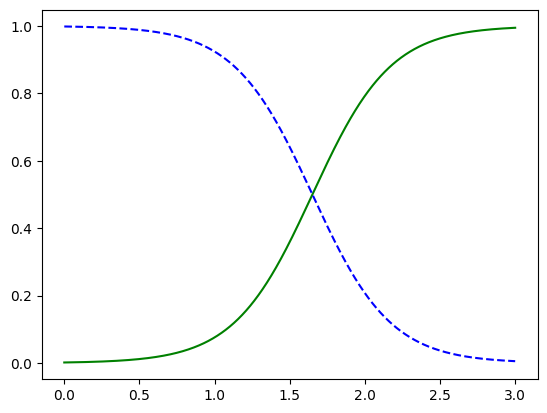

In [ ]:
# That's it we have a model.
# So let's examine it.

# create some sample inputs
X_new = np.linspace(0,3,1000).reshape(-1,1)

# use the model to predict the outputs as probabilities.
y_proba = log_reg_1.predict_proba(X_new)



# Now we can plot our information
plt.plot(X_new, y_proba[:,1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:,0], "b--", label="Not Iris-Virginica")
X = iris.data[["petal width (cm)"]].values

# Update the graph to include x and y labels, a legend and a grid.

#plt.xlabel("Petal width (cm)")
#plt.ylabel("Probability")
#plt.legend()
#plt.grid()

plt.show()

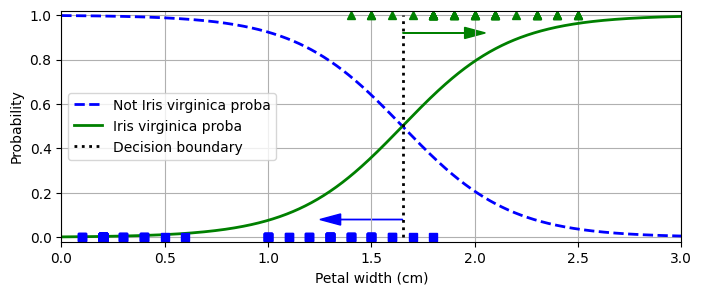

In [ ]:
# Here is an example of making this a much prettier plot

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg_1.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies the plot
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [ ]:
# Now let's see how we have more than one input

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg_2 = LogisticRegression(C=2, random_state=42)
log_reg_2.fit(X_train, y_train)


# Notice that the only thing we have changed is the input X which now has two
# features length and width. The library takes care of everything else.

LogisticRegression(C=2, random_state=42)

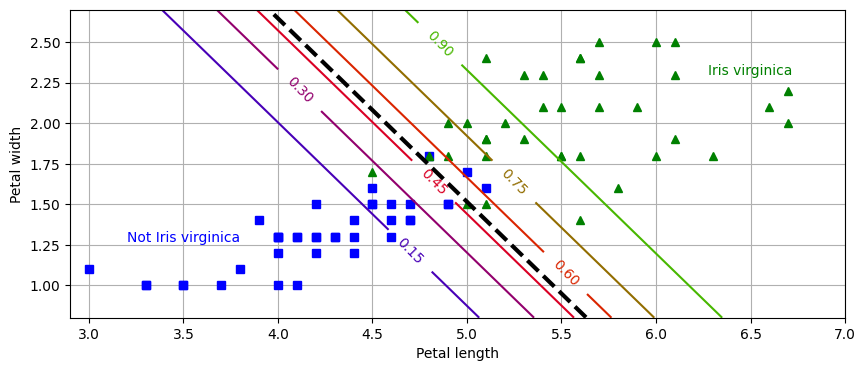

In [ ]:

# Now for the  plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg_2.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg_2.coef_[0, 0] * left_right + log_reg_2.intercept_[0])
             / log_reg_2.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()

plt.show()

In [47]:
# Challenge Try building a classifier that uses speal rather than petal dimensions and then
# plot the results


In [49]:
# a quick note on saving models
import pickle

with open('model.pkl','wb') as f:
    pickle.dump(log_reg_2,f)


In [50]:
# We could then load it back in with

with open('model.pkl', 'rb') as f:
    log_reg_mdl = pickle.load(f)


In [57]:
y_proba = log_reg_mdl.predict_proba(X_new)
print(y_proba[0:5, 0])

[0.99976526 0.99975928 0.99975316 0.99974688 0.99974043]
